In [2]:
%pylab inline

# Params
DATADIR = "/storage/mgymrek/gtex-estrs/revision/misc"
RESULTSDIR = "/storage/mgymrek/gtex-estrs/revision/figures"

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Import libraries
import os
import pandas as pd
import scipy.stats

############ Set up paths #############
SAVEPLOT = True

############ Load data ################
pca = pd.read_csv(os.path.join(DATADIR, "GTEx_1KG_merged_650.pca.evec"), sep='\s+')
pca.columns = ["PC%s"%i for i in range(1, 11)] + ["pop"]
pca = pca.fillna({'pop':'1000Genomes'})

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%bash -s "$DATADIR"

DATADIR=$1

# Population breakdown of GTEx cohort
cat ${DATADIR}/GTEx_1KG_merged_650.ind.poplabels | grep -v NA | cut -f 3 | sort | uniq -c


     75 AfricanAmerican
      3 Amerindian
      8 Asian
    561 European
      5 Unknown


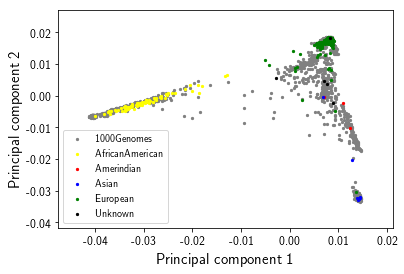

In [3]:
COLORS = {'AMR':'slategray', 
          'AFR':'gray',
          'EUR':'lightgray', 
          'EAS':'k', 
          'SAS':'lightslategrey', 
          'AfricanAmerican':'yellow', 
          'Asian':'blue', 
          'European':'green',
          'Amerindian':'red', 
          '1000Genomes':'grey',
          'Unknown':'k'
         }

fig, ax = plt.subplots()
grouped = pca.groupby('pop')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', marker='.', x='PC1', y='PC2', label=key, color=COLORS[key])

plt.legend(loc="lower left")
ax.set_xlabel("Principal component 1", size=15)
ax.set_ylabel("Principal component 2", size=15)
ax.set_xticklabels(["%.2f"%item for item in ax.get_xticks()], size=12)
ax.set_yticklabels(["%.2f"%item for item in ax.get_yticks()], size=12);
if SAVEPLOT: fig.savefig(os.path.join(RESULTSDIR, "SuppFig_POPPCA.pdf"))